In [11]:
import json

def check_overlap(file1_path, file2_path, label):
    with open(file1_path, "r") as f:
        file1_neurons = json.load(f)["neurons"]
        
    with open(file2_path, "r") as f:
        file2_neurons = json.load(f)["neurons"]
        
    for top_n in [0.4]: # , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
        sum_overlap = []
        for layer_nb in range(6, 27):
            file1_layer_neurons = file1_neurons[layer_nb]
            file2_layer_neurons = file2_neurons[layer_nb]
            
            # top_n = 0.3
            n = int(len(file1_layer_neurons) * top_n)
            first_40_file1 = set(file1_layer_neurons[:n])
            first_40_file2 = set(file2_layer_neurons[:n])
            overlap = first_40_file1 & first_40_file2
            percent_overlap = len(overlap) / min(len(first_40_file1), len(first_40_file2)) * 100
            sum_overlap.append(percent_overlap)
            # print(f"Layer {layer_nb}: {percent_overlap:.2f}% overlap in first {int(top_n*100)}%")
            
        print(f"{label}: {(sum(sum_overlap) / len(sum_overlap)):.2f}%")

for model_name in ["llama3-3b", "opt-6.7b"]:
    print("Model:", model_name, "\n")
    
    print("Comparing model neurons with dataset-specific neurons:")
    file1_path = f"../neuron_files/{model_name}/model_neurons.json"
    for dataset in ["triviaqa", "squadv2", "wmt16-de-en", "wmt16-ro-en", "xsum", "cnn_dailymail"]:
        file2_path = f"../neuron_files/{model_name}/{dataset}_dataset_neurons.json"
        check_overlap(file1_path, file2_path, dataset)
    
    print("\nComparing dataset-specific neurons with each other:")
    for dataset1 in ["triviaqa", "squadv2", "wmt16-de-en", "wmt16-ro-en", "xsum", "cnn_dailymail"]:
        file1_path = f"../neuron_files/{model_name}/{dataset1}_dataset_neurons.json"
        for dataset2 in ["triviaqa", "squadv2", "wmt16-de-en", "wmt16-ro-en", "xsum", "cnn_dailymail"]:
            if dataset1 == dataset2:
                continue
            
            file2_path = f"../neuron_files/{model_name}/{dataset2}_dataset_neurons.json"
            check_overlap(file1_path, file2_path, f"{dataset1} vs {dataset2}")
            
    print("\n" + "="*50 + "\n")

Model: llama3-3b 

Comparing model neurons with dataset-specific neurons:
triviaqa: 76.64%
squadv2: 78.14%
wmt16-de-en: 77.41%
wmt16-ro-en: 76.55%
xsum: 77.71%
cnn_dailymail: 78.89%

Comparing dataset-specific neurons with each other:
triviaqa vs squadv2: 90.91%
triviaqa vs wmt16-de-en: 71.07%
triviaqa vs wmt16-ro-en: 71.63%
triviaqa vs xsum: 75.73%
triviaqa vs cnn_dailymail: 76.52%
squadv2 vs triviaqa: 90.91%
squadv2 vs wmt16-de-en: 71.92%
squadv2 vs wmt16-ro-en: 72.41%
squadv2 vs xsum: 76.72%
squadv2 vs cnn_dailymail: 78.27%
wmt16-de-en vs triviaqa: 71.07%
wmt16-de-en vs squadv2: 71.92%
wmt16-de-en vs wmt16-ro-en: 79.36%
wmt16-de-en vs xsum: 73.11%
wmt16-de-en vs cnn_dailymail: 73.25%
wmt16-ro-en vs triviaqa: 71.63%
wmt16-ro-en vs squadv2: 72.41%
wmt16-ro-en vs wmt16-de-en: 79.36%
wmt16-ro-en vs xsum: 73.08%
wmt16-ro-en vs cnn_dailymail: 73.24%
xsum vs triviaqa: 75.73%
xsum vs squadv2: 76.72%
xsum vs wmt16-de-en: 73.11%
xsum vs wmt16-ro-en: 73.08%
xsum vs cnn_dailymail: 88.84%
cnn_da

### Prove that they exist for each different task

In [27]:
import json

datasets_common_indices = []
for dataset in ["piqa", "wmt16-de-en", "cnn_dailymail"]:
    neurons = []
    for i in range(0, 10):
        file_path = f"./insights_files/neuron_files/{dataset}/{i}.json"
        with open(file_path, "r") as f:
            n = json.load(f)["neurons"]
            neurons.append(n)
        
    for top_n in [0.4]: # , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
        sum_overlap = []
        for layer_nb in range(6, 27):
            top_neurons_all = []
            for neurons_file in neurons:
                file_layer_neurons = neurons_file[layer_nb]
                
                n = int(len(file_layer_neurons) * top_n)
                first_n_file = set(file_layer_neurons[:n])
                top_neurons_all.append(first_n_file)
                
            common_indices = set.intersection(*top_neurons_all)
            datasets_common_indices.append(common_indices)
            avg_set_size = sum(len(s) for s in top_neurons_all) / len(top_neurons_all)
            overlap_percentage = (len(common_indices) / avg_set_size) * 100
            
            sum_overlap.append(overlap_percentage)
            # print(f"Layer {layer_nb}: {overlap_percentage:.2f}% overlap in first {int(top_n*100)}%")
            
        print(f"{dataset}: Avg in top {int(top_n*100)}%: {sum(sum_overlap) / len(sum_overlap)}")

piqa: Avg in top 40%: 58.64585150299437
wmt16-de-en: Avg in top 40%: 65.84830513401941
cnn_dailymail: Avg in top 40%: 69.54910169195884


### Prove that they are different for each task

In [35]:
new_set = datasets_common_indices[0] & datasets_common_indices[1]
print(len(new_set) / ((len(datasets_common_indices[0]) + len(datasets_common_indices[1])) / 2))

new_set = datasets_common_indices[0] & datasets_common_indices[2]
print(len(new_set) / ((len(datasets_common_indices[0]) + len(datasets_common_indices[2])) / 2))

new_set = datasets_common_indices[3] & datasets_common_indices[2]
print(len(new_set) / ((len(datasets_common_indices[3]) + len(datasets_common_indices[2])) / 2))

0.2438153532262178
0.25347912524850896
0.2588568729333963


# Draw Results

/tmp/ipykernel_275777/2324951400.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(task_specific.keys()), y=list(task_specific.values()), palette="Blues_d")


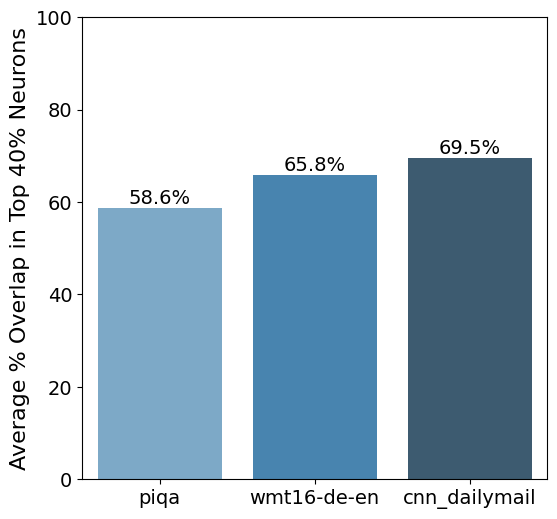

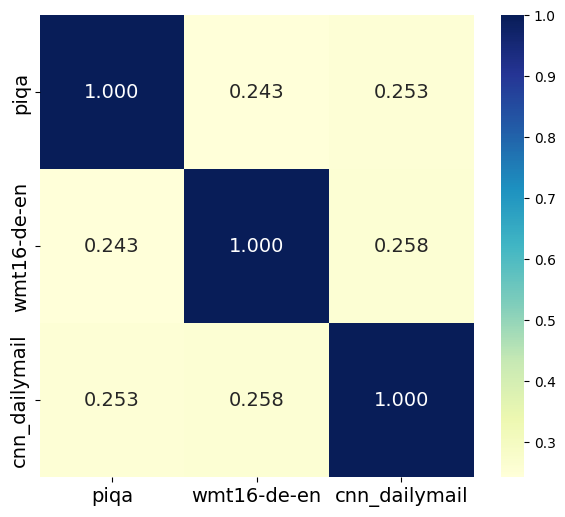

/tmp/ipykernel_275777/2324951400.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_neurons.keys()), y=list(model_neurons.values()), palette="Greens_d")


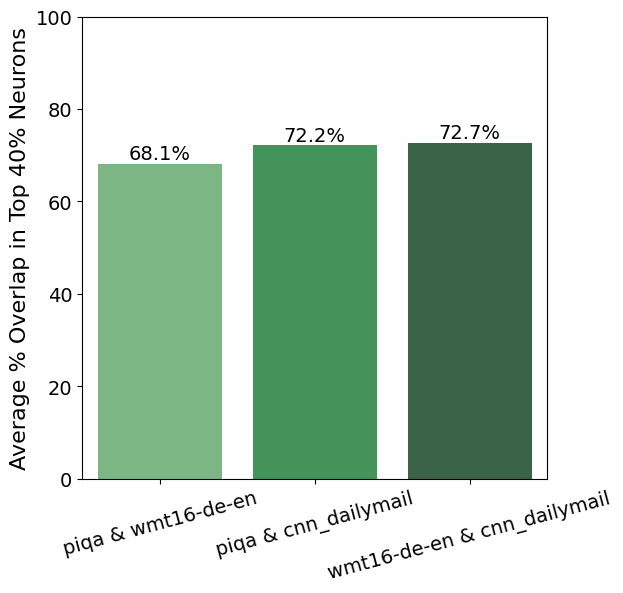

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1. Task-specific overlaps
# -------------------------------
task_specific = {
    "piqa": 58.645,
    "wmt16-de-en": 65.848,
    "cnn_dailymail": 69.549
}

plt.figure(figsize=(6, 6))
sns.barplot(x=list(task_specific.keys()), y=list(task_specific.values()), palette="Blues_d")
plt.ylabel("Average % Overlap in Top 40% Neurons", fontsize=16)
# plt.title("Task-Specific Neuron Consistency (Intra-Task)")
plt.ylim(0, 100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(task_specific.values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=14)
plt.show()


# -------------------------------
# 2. Cross-task overlaps (Task-specific neurons differ)
# -------------------------------
cross_task = {
    "piqa & wmt16-de-en": 0.243,
    "piqa & cnn_dailymail": 0.253,
    "wmt16-de-en & cnn_dailymail": 0.258
}

# Convert into heatmap matrix
tasks = ["piqa", "wmt16-de-en", "cnn_dailymail"]
matrix = np.array([
    [1.0, cross_task["piqa & wmt16-de-en"], cross_task["piqa & cnn_dailymail"]],
    [cross_task["piqa & wmt16-de-en"], 1.0, cross_task["wmt16-de-en & cnn_dailymail"]],
    [cross_task["piqa & cnn_dailymail"], cross_task["wmt16-de-en & cnn_dailymail"], 1.0]
])

plt.figure(figsize=(7, 6))
sns.heatmap(matrix, xticklabels=tasks, yticklabels=tasks, annot=True, cmap="YlGnBu", fmt=".3f", annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title("Cross-Task Neuron Overlap (Task-Specificity)")
plt.show()


# -------------------------------
# 3. Model neurons (general overlap across tasks)
# -------------------------------
model_neurons = {
    "piqa & wmt16-de-en": 68.101,
    "piqa & cnn_dailymail": 72.150,
    "wmt16-de-en & cnn_dailymail": 72.694
}

plt.figure(figsize=(6, 6))
sns.barplot(x=list(model_neurons.keys()), y=list(model_neurons.values()), palette="Greens_d")
plt.ylabel("Average % Overlap in Top 40% Neurons", fontsize=16)
# plt.title("Model Neurons (General Overlap Across Tasks)")
plt.ylim(0, 100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=15)
for i, v in enumerate(model_neurons.values()):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=14)
plt.show()
